## Load Data from CSVs

In [58]:
import unicodecsv
import json

def print_data(data):
    if len(data) > 0:
        print("\n",json.dumps(data, indent=4, sort_keys=True, default=str))
    else:
        print("\nempty")
    
def print_data_0(data):
    if len(data) > 0:
        print("\n",json.dumps(data[0], indent=4, sort_keys=True, default=str))
    else:
        print("\nempty")

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
print_data(enrollments[0])


 {
    "account_key": "448",
    "cancel_date": "2015-01-14",
    "days_to_cancel": "65",
    "is_canceled": "True",
    "is_udacity": "True",
    "join_date": "2014-11-10",
    "status": "canceled"
}


In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
print_data(daily_engagement[0])

{
    "acct": "0",
    "utc_date": "2015-01-09",
    "num_courses_visited": "1.0",
    "total_minutes_visited": "11.6793745",
    "lessons_completed": "0.0",
    "projects_completed": "0.0"
}


In [3]:
with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
print_data(project_submissions[0])

{
    "creation_date": "2015-01-14",
    "completion_date": "2015-01-16",
    "assigned_rating": "UNGRADED",
    "account_key": "256",
    "lesson_key": "3176718735",
    "processing_state": "EVALUATED"
}


## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
#can't print json becuase datetime is not serializable
print_data_0(enrollments)


 {
    "account_key": "448",
    "cancel_date": "2015-01-14 00:00:00",
    "days_to_cancel": 65,
    "is_canceled": true,
    "is_udacity": true,
    "join_date": "2014-11-10 00:00:00",
    "status": "canceled"
}


In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
print_data_0(daily_engagement)


 {
    "acct": "0",
    "lessons_completed": 0,
    "num_courses_visited": 1,
    "projects_completed": 0,
    "total_minutes_visited": 11.6793745,
    "utc_date": "2015-01-09 00:00:00"
}


In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

print_data_0(project_submissions)


 {
    "account_key": "256",
    "assigned_rating": "UNGRADED",
    "completion_date": "2015-01-16 00:00:00",
    "creation_date": "2015-01-14 00:00:00",
    "lesson_key": "3176718735",
    "processing_state": "EVALUATED"
}


## Investigating the Data

## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for row in daily_engagement:
    row['account_key'] = row['acct']
    del(row['acct'])
print_data_0(daily_engagement)


 {
    "account_key": "0",
    "lessons_completed": 0,
    "num_courses_visited": 1,
    "projects_completed": 0,
    "total_minutes_visited": 11.6793745,
    "utc_date": "2015-01-09 00:00:00"
}


In [8]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

unique_enrollments = set()
for rows in enrollments:
    unique_enrollments.add(rows['account_key'])
print("total enrollments: ", len(enrollments))
print("unique enrollments: ", len(unique_enrollments))

unique_engagements = set()
for rows in daily_engagement:
    unique_engagements.add(rows['account_key'])
print("\ntotal engagements: ", len(daily_engagement))
print("unique engagements: ", len(unique_engagements))

unique_submissions = set()
for rows in project_submissions:
    unique_submissions.add(rows['account_key'])
print("\ntotal submissions: ", len(project_submissions))
print("unique submissions: ", len(unique_submissions))

total enrollments:  1640
unique enrollments:  1302

total engagements:  136240
unique engagements:  1237

total submissions:  3642
unique submissions:  743


## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments:
    if enrollment['account_key'] not in unique_engagements:
        print_data(enrollment)
        break
# the odd enrollments all have 'days_to_cancel' = 0


 {
    "account_key": "1219",
    "cancel_date": "2014-11-12 00:00:00",
    "days_to_cancel": 0,
    "is_canceled": true,
    "is_udacity": false,
    "join_date": "2014-11-12 00:00:00",
    "status": "canceled"
}


## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

# this question is poorly worded; it wants missing engagements excluding the ones found above
issues = 0
for enrollment in enrollments:
    if enrollment['account_key'] not in unique_engagements \
            and enrollment['days_to_cancel'] != 0:
        issues += 1
print(issues)

3


## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

# haven't canceled yet: enrollments['is_canceled'] == false
# enrolled > 7 days: enrollments['days_to_cancel'] > 7

paid_students = {} # empty dictionary
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        # don't add duplicate students; use most recent enrollment
        if account_key not in paid_students \
                or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
len(paid_students)
        

995

## Getting Data from First Week

In [15]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [16]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

# exclude < 1 week becuase they are free trials

paid_engagement_in_first_week = [ ]
for engagement in non_udacity_engagement:
    account_key = engagement['account_key']
    
    if account_key in paid_students: # one of the paid students
        join_date = paid_students[account_key]
        engagement_date = engagement['utc_date']
        
        if within_one_week(join_date, engagement_date): # within 1 week of join date
            paid_engagement_in_first_week.append(engagement)
            
print(len(paid_engagement_in_first_week))

6919


In [129]:
# their suggested method
#takes a list of dictionaries, and removes those canceld after trials
def remove_free_trial_cancels(data):
    new_data = [ ]
    for record in data:
        if record['account_key'] in paid_students:
            new_data.append(record)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagements = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

# return data where 'date' and  'join_date' are within 7 days
def in_first_week(data, date):
    first_week_data = [ ]
    for record in data:
        account_key = record['account_key']
        join_date = paid_students[account_key]
        record_date  = record[date]
        if within_one_week(join_date, record_date):
            first_week_data.append(record)
    return first_week_data

paid_engagement_in_first_week = in_first_week(paid_engagements, 'utc_date')
print(len(paid_engagement_in_first_week))

6919


## Exploring Student Engagement

In [18]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [19]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [20]:
total_minutes = list(total_minutes_by_account.values())

import numpy as np

# Summarize the data about minutes spent in the classroom
#print(total_minutes[0])
print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [21]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_max = None
max_min = 0
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_min:
        max_min = total_minutes
        student_max = student
for engagement in paid_engagement_in_first_week:
    if student_max == engagement['account_key']:
        print_data(engagement)
# updated within_one_week() to exclude engagements from earlier enrollments


 {
    "account_key": "163",
    "lessons_completed": 4,
    "num_courses_visited": 4,
    "projects_completed": 0,
    "total_minutes_visited": 850.519339666,
    "utc_date": "2015-07-09 00:00:00"
}

 {
    "account_key": "163",
    "lessons_completed": 6,
    "num_courses_visited": 6,
    "projects_completed": 0,
    "total_minutes_visited": 872.633923334,
    "utc_date": "2015-07-10 00:00:00"
}

 {
    "account_key": "163",
    "lessons_completed": 6,
    "num_courses_visited": 2,
    "projects_completed": 0,
    "total_minutes_visited": 777.018903666,
    "utc_date": "2015-07-11 00:00:00"
}

 {
    "account_key": "163",
    "lessons_completed": 2,
    "num_courses_visited": 1,
    "projects_completed": 0,
    "total_minutes_visited": 294.568774,
    "utc_date": "2015-07-12 00:00:00"
}

 {
    "account_key": "163",
    "lessons_completed": 1,
    "num_courses_visited": 3,
    "projects_completed": 0,
    "total_minutes_visited": 471.2139785,
    "utc_date": "2015-07-13 00:00:00"
}


## Lessons Completed in First Week

In [170]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

# turn data list into a dictionary 
def group_data(data,key):
    grouped_data = defaultdict(list)
    for record in data:
        # data is a list of dictionaries
        # record is a dictionary
        value = record[key]
        grouped_data[ value ].append( record )
        # grouped_data is a dictionary of lists of dictionaries
    return grouped_data

# sum all dictionary values with the given key
def sum_grouped_data(data, field):
    summed_data = {}
    for key, value_list in data.items(): 
        # the key is the index of the grouped data
        # value_list is a list of dictionaries, each with several key:value pairs
        total = 0
        # sum each dict's values of the given field
        for value in value_list:
            # value_list is a list of dictionaries
            # value is a single dictionary
            total += value[field]
        summed_data[key] = total
        # why didn't the below work?
         # for value in value_list:
           # summed_data[key] += value[field]
    return summed_data

def describe_data(data):
    data_temp = list(data.values()) # for python 3...
    print ('\tMean:', np.mean(data_temp))
    print ('\tStandard deviation:', np.std(data_temp))
    print ('\tMinimum:', np.min(data_temp))
    print ('\tMaximum:', np.max(data_temp))

In [204]:
account_engagement = group_data(paid_engagement_in_first_week, 'account_key')
account_lessons = sum_grouped_data(account_engagement, 'lessons_completed')
describe_data(account_lessons)

#print_data(paid_engagement_in_first_week[0:1])
#print_data(account_engagement["0"])

	Mean: 1.636180904522613
	Standard deviation: 3.002561299829423
	Minimum: 0
	Maximum: 36


## Number of Visits in First Week

In [128]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

# "visits the classroom" means visited any class
# for variety, I'll create a new key:value for with day : visited
# can't do this for paid_engagement_in_first_week becuase we may use later dates as well.
# easiest possible place to edit fields is paid_engagements
for engagement in paid_engagements:
    if engagement['num_courses_visited'] > 0:
        engagement['visited'] = 1
    else:
        engagement['visited'] = 0
#print(paid_engagements[0])

account_visits = sum_grouped_data(account_engagement, 'visited')
describe_data(account_visits)



Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [154]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

In [151]:
account_submission = group_data(paid_submissions, 'account_key')

keys_passed = set()
accounts_passing_engagement = [ ]
accounts_non_passing_engagement = [ ]
for account_key, list_dict in account_submission.items(): # find each student's key
    for submission in list_dict: 
        project = submission['lesson_key']
        rating = submission['assigned_rating']
        if project in subway_project_lesson_keys \
                    and ( rating in ('PASSED', 'DISTINCTION') ) \
                    and ( account_key not in keys_passed ): 
                                                                                            # and place passers in passing_engagement
            accounts_passing_engagement.append(account_engagement[account_key])
            keys_passed.add(account_key)
                                                                                            # and the rest in non_passing_engagement
    if account_key not in keys_passed: 
        accounts_non_passing_engagement.append(account_engagement[account_key]) 

print("\nsubmitters: ", len(account_subbmission))
print("passing students: ", len(account_passing_engagement))
print("non passing students: ",  len(account_non_passing_engagement) )


submitters:  731
passing students:  647
non passing students:  84


In [202]:


keys_passed = set()
for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys \
                    and ( rating in ('PASSED', 'DISTINCTION') ):
        keys_passed.add(submission['account_key']) 
        
passing_engagement = [ ]
non_passing_engagement = [ ]
for engagement in paid_engagement_in_first_week:
    # paid_engagement_in_first_week is a list of dictionaries
    # engagement is a dictionary
    if engagement['account_key']  in keys_passed:  
        passing_engagement.append(engagement) 
        # passing_engagement is a list of dictionaries:  [engagement, . . .]
    else: 
        non_passing_engagement.append(engagement) 
        
print("\nengagements: ", len(paid_engagement_in_first_week))
print("passing students' engagements: ", len(passing_engagement))
print("non passing students' engagements: ",  len(non_passing_engagement))

# why do some students in passing_engagement have "projects_completed": 0 ?
# why does paid_engagement_in_first_week only have one engagement for each student?


engagements:  6919
passing students' engagements:  4527
non passing students' engagements:  2392


## Comparing the Two Student Groups

In [200]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

account_passing = group_data(passing_engagement, 'account_key')
account_lessons = sum_grouped_data(account_passing, 'lessons_completed')
account_minutes = sum_grouped_data(account_passing, 'total_minutes_visited')
account_visits = sum_grouped_data(account_passing, 'visited')
print("\npassed lesson")
describe_data(account_lessons)
print("passed minutes")
describe_data(account_minutes)
print("passed visits")
describe_data(account_visits)


passed lesson
	Mean: 2.052550231839258
	Standard deviation: 3.1422270555779344
	Minimum: 0
	Maximum: 36
passed minutes
	Mean: 394.58604648350865
	Standard deviation: 448.4995193265521
	Minimum: 0.0
	Maximum: 3564.7332644989997
passed visits
	Mean: 3.384853168469861
	Standard deviation: 2.2588214709184595
	Minimum: 0
	Maximum: 7


In [203]:
account_non_passing = group_data(non_passing_engagement, 'account_key')
account_lessons = sum_grouped_data(account_non_passing, 'lessons_completed')
account_minutes = sum_grouped_data(account_non_passing, 'total_minutes_visited')
account_visits = sum_grouped_data(account_non_passing, 'visited')
print("\nnon_passing lesson")
describe_data(account_lessons)
print("non_passing minutes")
describe_data(account_minutes)
print("non_passing visits")
describe_data(account_visits)


non_passing lesson
	Mean: 0.8620689655172413
	Standard deviation: 2.5491599418312028
	Minimum: 0
	Maximum: 27
non_passing minutes
	Mean: 143.32647426675584
	Standard deviation: 269.5386190114951
	Minimum: 0.0
	Maximum: 1768.5227493319999
non_passing visits
	Mean: 1.9051724137931034
	Standard deviation: 1.9057314413619046
	Minimum: 0
	Maximum: 7


## Making Histograms

In [269]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

#print_data(account_passing["0"])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(data):
    data_list = list(data.values()) # for python 3...
    print('\tCount:', len(data_list))
    print ('\tMean:', np.mean(data_list))
    print ('\tStandard deviation:', np.std(data_list))
    print ('\tMinimum:', np.min(data_list))
    print ('\tMaximum:', np.max(data_list))
    plt.hist(data_list, bins = 'sqrt')
    
pass_lessons = sum_grouped_data(account_passing, 'lessons_completed')
pass_minutes = sum_grouped_data(account_passing, 'total_minutes_visited')
pass_visits  = sum_grouped_data(account_passing, 'visited')

non_pass_lessons = sum_grouped_data(account_non_passing, 'lessons_completed')
non_pass_minutes = sum_grouped_data(account_non_passing, 'total_minutes_visited')
non_pass_visits  = sum_grouped_data(account_non_passing, 'visited')

	Count: 647
	Mean: 2.052550231839258
	Standard deviation: 3.1422270555779344
	Minimum: 0
	Maximum: 36
	Count: 348
	Mean: 1.9051724137931034
	Standard deviation: 1.9057314413619046
	Minimum: 0
	Maximum: 7


Text(0,0.5,'students')

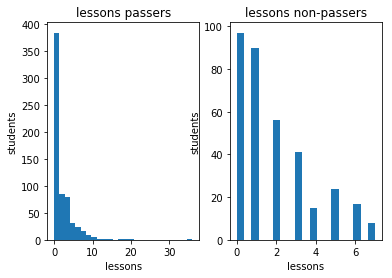

In [272]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plot_data(pass_lessons)
a.set_title('lessons passers')
plt.xlabel('lessons')
plt.ylabel('students')

a = fig.add_subplot(1, 2, 2)
plot_data(non_pass_visits)
a.set_title('lessons non-passers')
plt.xlabel('lessons')
plt.ylabel('students')

	Count: 647
	Mean: 394.58604648350865
	Standard deviation: 448.4995193265521
	Minimum: 0.0
	Maximum: 3564.7332644989997
	Count: 348
	Mean: 143.32647426675584
	Standard deviation: 269.5386190114951
	Minimum: 0.0
	Maximum: 1768.5227493319999


Text(0,0.5,'students')

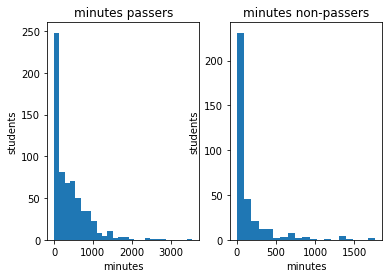

In [273]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plot_data(pass_minutes)
a.set_title('minutes passers')
plt.xlabel('minutes')
plt.ylabel('students')

a = fig.add_subplot(1, 2, 2)
plot_data(non_pass_minutes)
a.set_title('minutes non-passers')
plt.xlabel('minutes')
plt.ylabel('students')

	Count: 647
	Mean: 3.384853168469861
	Standard deviation: 2.2588214709184595
	Minimum: 0
	Maximum: 7
	Count: 348
	Mean: 1.9051724137931034
	Standard deviation: 1.9057314413619046
	Minimum: 0
	Maximum: 7


Text(0,0.5,'students')

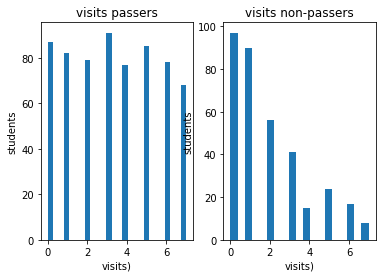

In [271]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plot_data(pass_visits)
a.set_title('visits passers')
plt.xlabel('visits)')
plt.ylabel('students')

a = fig.add_subplot(1, 2, 2)
plot_data(non_pass_visits)
a.set_title('visits non-passers')
plt.xlabel('visits)')
plt.ylabel('students')

## Improving Plots and Sharing Findings

In [28]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.